# Sprint19課題 データセット作成

## 【問題1】自作データセットでの分類の学習
自作のデータセットに対して分類問題を解いてください。任意の実装を使用してください。

In [1]:
import numpy  as np
import os
import glob 
import re
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from keras.models import Sequential
from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Flatten
from keras import backend as K
from keras.preprocessing import image
from skimage.color import label2rgb
import albumentations as A
import random


Using TensorFlow backend.


In [2]:
dog_path = './picture/dog' 
dog_list = os.listdir(dog_path)

cat_path = './picture/cat' 
cat_list = os.listdir(cat_path)

In [3]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in dog_list:
    if '.jpg' in img:
        dog_img = Image.open('picture/dog/' + img)
        dog_img = np.asarray(dog_img)
        dog_img = cv2.resize(dog_img, (224,224))
        dog_img_array = np.concatenate([dog_img_array, dog_img.reshape(1,224,224,3)], axis=0)
    
for img in cat_list:
    if '.jpg' in img:
        cat_img = Image.open('picture/cat/' + img)
        cat_img = np.asarray(cat_img)
        cat_img = cv2.resize(cat_img, (224,224))
        cat_img_array = np.concatenate([cat_img_array, cat_img.reshape(1,224,224,3)], axis = 0)
    
    

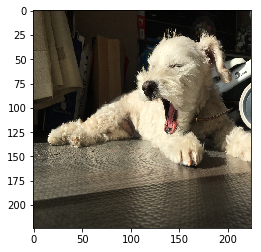

In [4]:
# dog_imgの一例
plt.imshow(dog_img_array[0]/255)

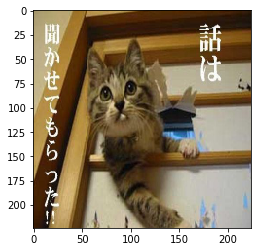

In [5]:
# cat_imageの一例
plt.imshow(cat_img_array[0]/255)

In [6]:
# dog_imgとcat_imgを連結
img_array = np.concatenate([dog_img_array/255, cat_img_array/255])

# ターゲットラベルを付与
label = np.concatenate(
    [np.zeros([10]).astype(int), np.ones([10])]).reshape(-1, 1)

In [7]:
K.clear_session()

#ニューラルネットを構築
model =  Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(
    loss='binary_crossentropy', 
    optimizer='sgd', 
    metrics=['accuracy'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dens

In [8]:
# 学習
model.fit(
    img_array, 
    label,
    epochs=20,
    batch_size=1
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
20/20 [==============================] - 5s 259ms/step - loss: 0.7186 - acc: 0.4000
Epoch 2/20
20/20 [==============================] - 7s 342ms/step - loss: 0.6858 - acc: 0.6500
Epoch 3/20
20/20 [==============================] - 7s 331ms/step - loss: 0.6713 - acc: 0.7000
Epoch 4/20
20/20 [==============================] - 5s 262ms/step - loss: 0.5794 - acc: 0.8000
Epoch 5/20
20/20 [==============================] - 5s 231ms/step - loss: 0.5752 - acc: 0.6500
Epoch 6/20
20/20 [==============================] - 5s 227ms/step - loss: 0.5581 - acc: 0.8000
Epoch 7/20
20/20 [==============================] - 5s 229ms/step - loss: 0.5469 - acc: 0.8000
Epoch 8/20
20/20 [==============================] - 7s 341ms/step - loss: 0.6229 - acc: 0.7500
Epoch 9/20
20/20 [==============================] - 7s 354ms/step - loss: 0.3737 - acc: 0.8500
Epoch 10/20
20/20 [==============================] - 6s 320ms/step - loss: 0.5505 - acc: 0.7500
E

predict : cat
predict_prob : [[0.94779557]]


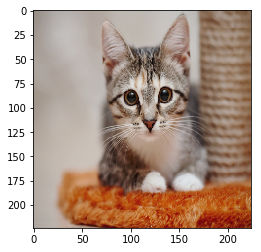

In [9]:
testimage = Image.open('./test/testimage_cat_001.jpg')
testimage = np.asarray(testimage)
testimage = cv2.resize(testimage, (224,224))

plt.imshow(testimage)

predict_prob = model.predict(testimage.reshape(1, 224,224,3)/255)
print('predict : {}'.format('dog' if predict_prob<=0.5 else 'cat'))
print('predict_prob : {}'.format(predict_prob))

predict : cat
predict_prob : [[0.999951]]


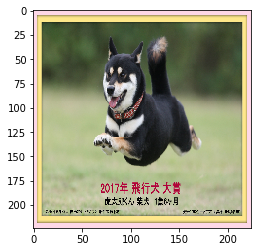

In [10]:
testimage = Image.open('./test/testimage_dog_001.jpg')
testimage = np.asarray(testimage)
testimage = cv2.resize(testimage, (224,224))

plt.imshow(testimage)

predict_prob = model.predict(testimage.reshape(1, 224,224,3)/255)
print('predict : {}'.format('dog' if predict_prob<=0.5 else 'cat'))
print('predict_prob : {}'.format(predict_prob))

predict : cat
predict_prob : [[0.9999628]]


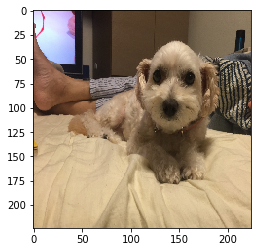

In [11]:
testimage = Image.open('./test/testimage_dog_002.jpg')
testimage = np.asarray(testimage)
testimage = cv2.resize(testimage, (224,224))

plt.imshow(testimage)

predict_prob = model.predict(testimage.reshape(1, 224,224,3)/255)
print('predict : {}'.format('dog' if predict_prob<=0.5 else 'cat'))
print('predict_prob : {}'.format(predict_prob))

- 犬に対する予測ができない。同一の犬でも、予測が行えなかった。

## 【問題2】分類データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。

**データ拡張のためのライブラリ**

データ拡張にはalbumentationsなどがあります。

[albu/albumentations: fast image augmentation library and easy to use wrapper around other libraries](https://github.com/albu/albumentations)

また、Kerasを使う場合はImageDataGeneratorも便利です。


**データ拡張の効果の調査**

データ拡張には様々な方法があります。今回のタスクにおいて各手法がどう効果があるかを実験・考察してください。

In [12]:
#枠の色指定
BOX_COLOR = (255, 0, 0)
#文字の色指定
TEXT_COLOR = (255, 255, 255)

#
def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2, **kwargs):
    #height, width = img.shape[:2]

    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    return img

def visualize_titles(img, bbox, title, color=BOX_COLOR, thickness=2, font_thickness = 2, font_scale=0.35, **kwargs):
    #height, width = img.shape[:2]
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    
    ((text_width, text_height), _) = cv2.getTextSize(title, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, title, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, font_scale, TEXT_COLOR,
                font_thickness, lineType=cv2.LINE_AA)
    return img


def augment_and_show(aug, image, mask=None, bboxes=[], categories=[], category_id_to_name=[], filename=None, 
                     font_scale_orig=0.35, 
                     font_scale_aug=0.35, show_title=True, **kwargs):

    augmented = aug(image=image, mask=mask, bboxes=bboxes, category_id=categories)

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #image_aug = cv2.cvtColor(augmented['image'], cv2.COLOR_BGR2RGB)
    image_aug = augmented['image']

    for bbox in bboxes:
        visualize_bbox(image, bbox, **kwargs)

    for bbox in augmented['bboxes']:
        visualize_bbox(image_aug, bbox, **kwargs)

    if show_title:
        for bbox,cat_id in zip(bboxes, categories):
            visualize_titles(image, bbox, category_id_to_name[cat_id], font_scale=font_scale_orig, **kwargs)
        for bbox,cat_id in zip(augmented['bboxes'], augmented['category_id']):
            visualize_titles(image_aug, bbox, category_id_to_name[cat_id], font_scale=font_scale_aug, **kwargs)

    
    if mask is None:
        f, ax = plt.subplots(1, 2, figsize=(16, 8))
        
        ax[0].imshow(image)
        ax[0].set_title('Original image')
        
        ax[1].imshow(image_aug)
        ax[1].set_title('Augmented image')
    else:
        f, ax = plt.subplots(2, 2, figsize=(16, 16))
        
        if len(mask.shape) != 3:
            mask = label2rgb(mask, bg_label=0)            
            mask_aug = label2rgb(augmented['mask'], bg_label=0)
        else:
            #mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            #mask_aug = cv2.cvtColor(augmented['mask'], cv2.COLOR_BGR2RGB)
            mask_aug = augmented['mask']
            
        ax[0, 0].imshow(image)
        ax[0, 0].set_title('Original image')
        
        ax[0, 1].imshow(image_aug)
        ax[0, 1].set_title('Augmented image')
        
        ax[1, 0].imshow(mask, interpolation='nearest')
        ax[1, 0].set_title('Original mask')

        ax[1, 1].imshow(mask_aug, interpolation='nearest')
        ax[1, 1].set_title('Augmented mask')

    f.tight_layout()
    if filename is not None:
        f.savefig(filename)
        
    return augmented['image'], augmented['mask'], augmented['bboxes']

def find_in_dir(dirname):
    return [os.path.join(dirname, fname) for fname in sorted(os.listdir(dirname))]

In [13]:
random.seed(42)

light = A.Compose([
    A.RandomBrightnessContrast(p=1),    
    A.RandomGamma(p=1),    
    A.CLAHE(p=1),    
], p=1)

medium = A.Compose([
    A.CLAHE(p=1),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=50, val_shift_limit=50, p=1),
], p=1)


strong = A.Compose([
    A.ChannelShuffle(p=1),
], p=1)

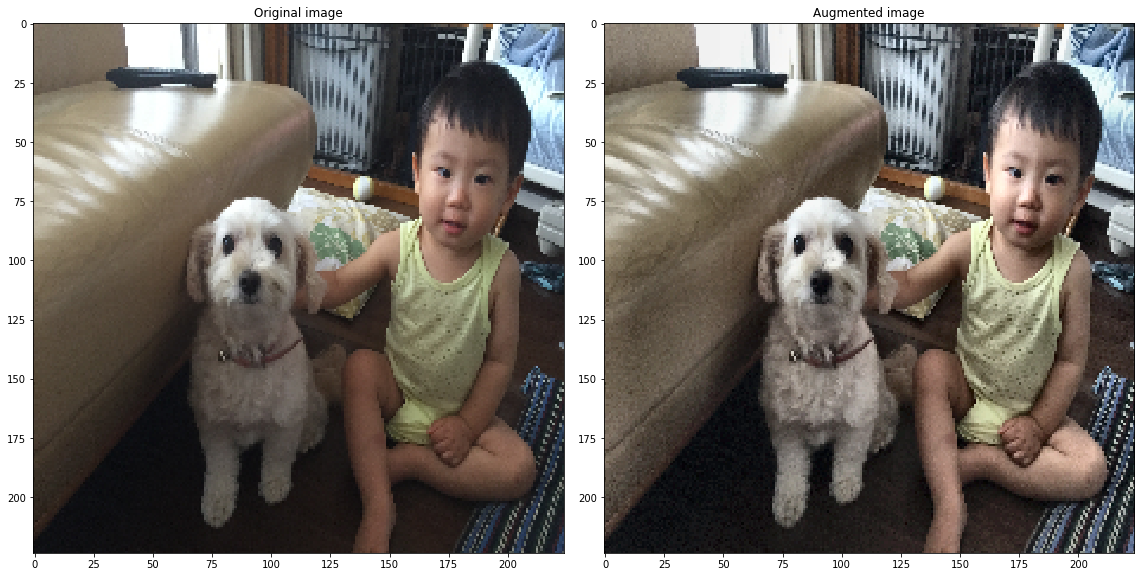

In [14]:
r = augment_and_show(light, dog_img_array[5].astype(np.uint8))

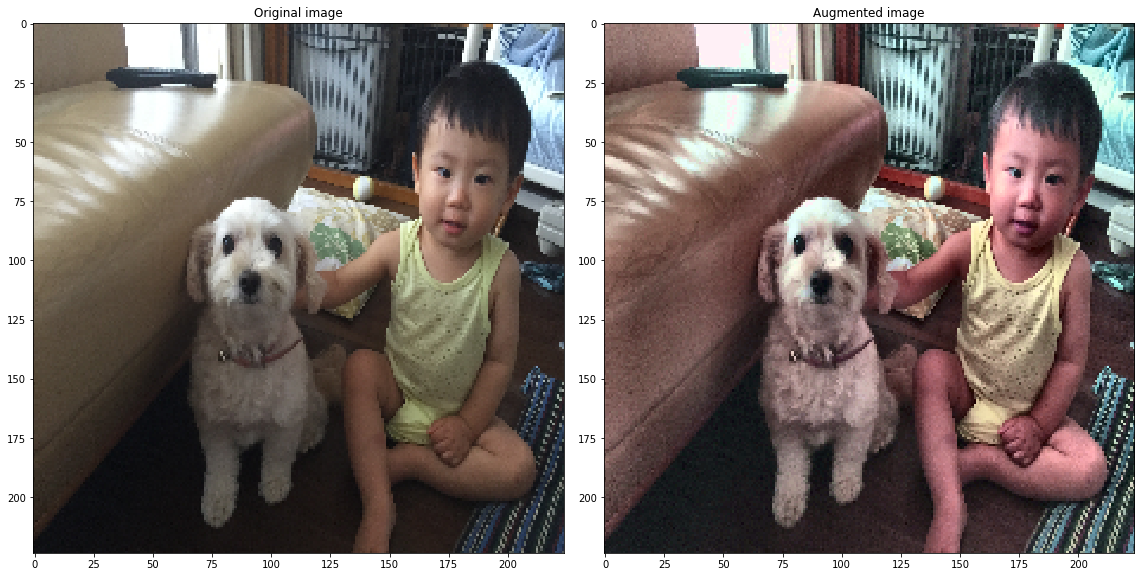

In [15]:
r = augment_and_show(medium, dog_img_array[5].astype(np.uint8))

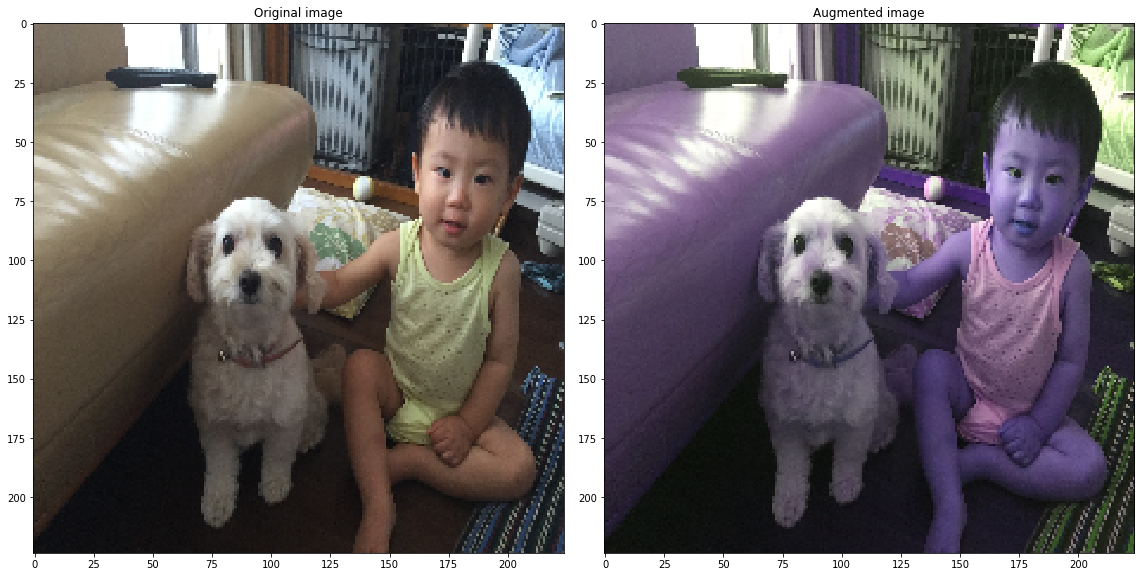

In [16]:
r = augment_and_show(strong, dog_img_array[5].astype(np.uint8))

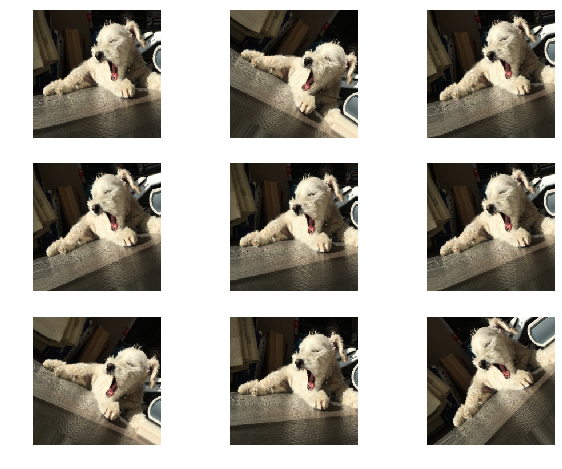

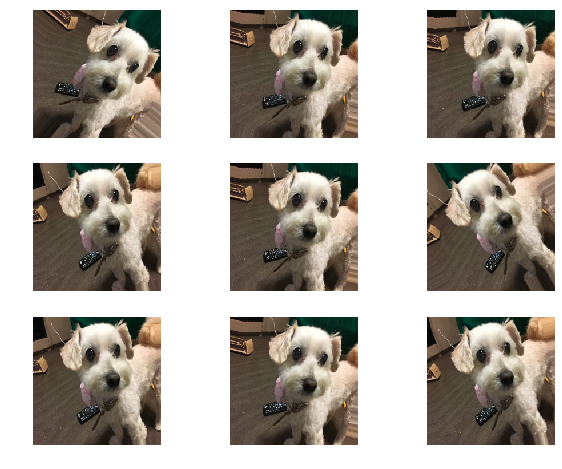

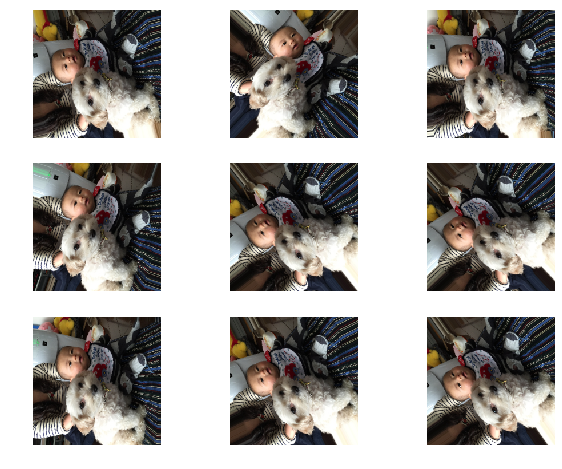

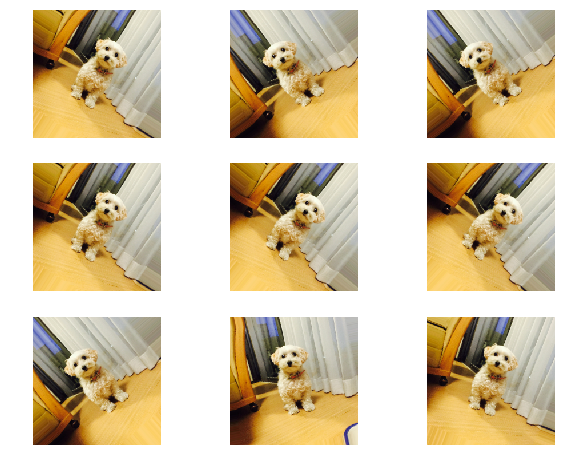

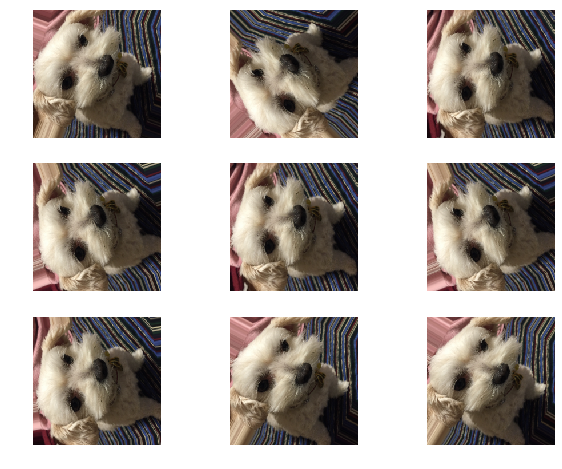

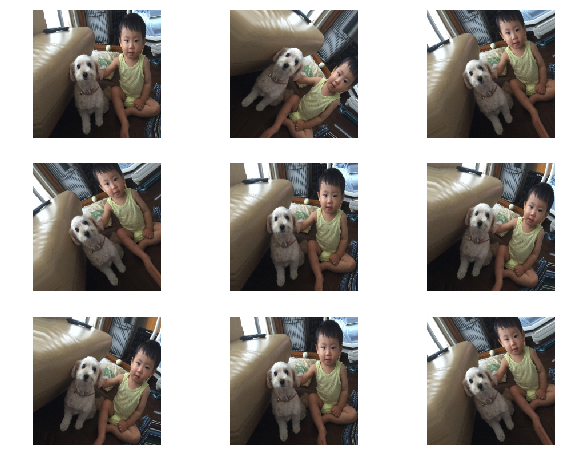

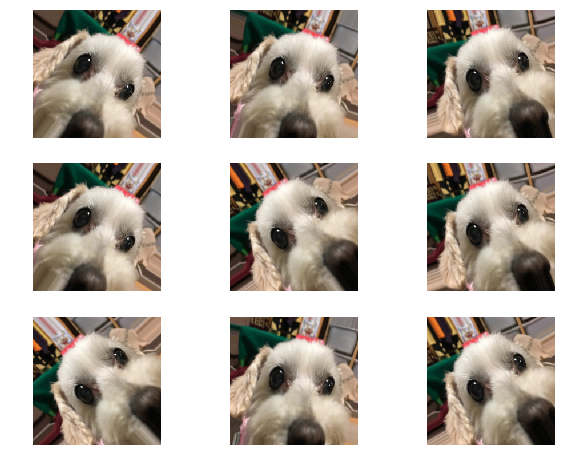

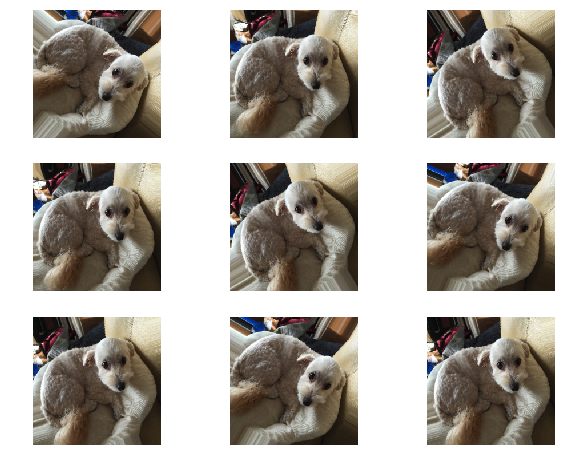

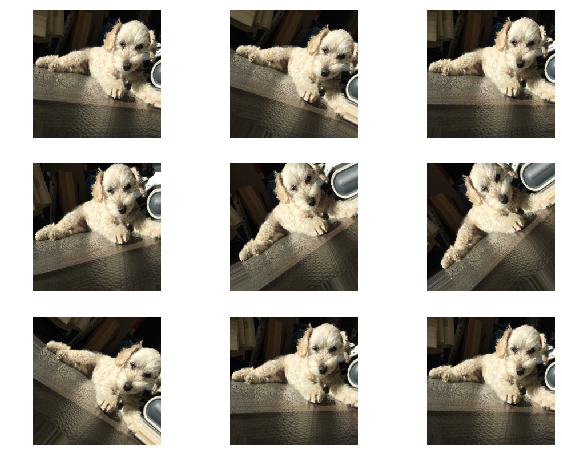

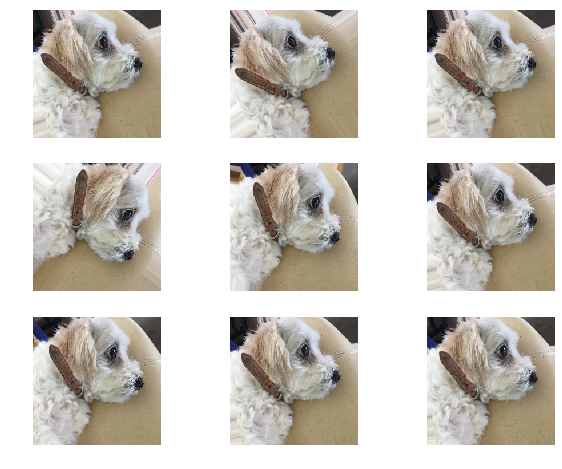

In [17]:
# 画像を読み込む。
for im in range(10):
    img = dog_img_array[im]

    # 画像データ生成器を作成する。
    # -20° ~ 20° の範囲でランダムに回転する。
    datagen = image.ImageDataGenerator(rotation_range=45)

    # ミニバッチを生成する Python ジェネレーターを作成する。
    x = img[np.newaxis]  #  (Height, Width, Channels)  -> (1, Height, Width, Channels) 
    gen = datagen.flow(x, batch_size=1)  # 1枚しかないので、ミニバッチ数は1

    # Python ジェネレーターで9枚生成して、表示する。
    plt.figure(figsize=(10, 8))
    for i in range(9):
        batches = next(gen)  # (NumBatches, Height, Width, Channels) の4次元データを返す。
        # 画像として表示するため、3次元データにし、float から uint8 にキャストする。
        gen_img = batches[0].astype(np.uint8)

        plt.subplot(3, 3, i + 1)
        plt.imshow(gen_img)
        plt.axis('off')
    plt.show()

In [18]:
save_path = 'output_dog'  # 保存ディレクトリのパス

# 指定したディレクトリが存在しないとエラーになるので、
# 予め作成しておく。
import os
os.makedirs(save_path, exist_ok=True)

for im in range(10):
    img = dog_img_array[im]

    # 画像データ生成器を作成する。
    # -20° ~ 20° の範囲でランダムに回転する。
    datagen = image.ImageDataGenerator(rotation_range=90)

    # ミニバッチを生成するジェネレーターを作成する。
    x = img[np.newaxis]  #  (Height, Width, Channels)  -> (1, Height, Width, Channels) 
    gen = datagen.flow(x, batch_size=1, save_to_dir=save_path,
                       save_prefix='generated_dog', save_format='png')

    # ジェネレーターで9枚生成する。
    plt.figure(figsize=(10, 8))
    for i in range(9):
        # ミニバッチを生成したタイミングでディレクトリに
        # 画像が保存される。
        next(gen)

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [19]:
save_path = 'output_cat'  # 保存ディレクトリのパス

# 指定したディレクトリが存在しないとエラーになるので、
# 予め作成しておく。
import os
os.makedirs(save_path, exist_ok=True)

for im in range(10):
    img = cat_img_array[im]

    # 画像データ生成器を作成する。
    # -20° ~ 20° の範囲でランダムに回転する。
    datagen = image.ImageDataGenerator(rotation_range=90)

    # ミニバッチを生成するジェネレーターを作成する。
    x = img[np.newaxis]  #  (Height, Width, Channels)  -> (1, Height, Width, Channels) 
    gen = datagen.flow(x, batch_size=1, save_to_dir=save_path,
                       save_prefix='generated_dog', save_format='png')

    # ジェネレーターで9枚生成する。
    plt.figure(figsize=(10, 8))
    for i in range(9):
        # ミニバッチを生成したタイミングでディレクトリに
        # 画像が保存される。
        next(gen)

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [20]:
dog_path = './output_dog' 
dog_list = os.listdir(dog_path)

cat_path = './output_cat' 
cat_list = os.listdir(cat_path)

In [21]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in dog_list:
    dog_img = Image.open('output_dog/' + img)
    dog_img = np.asarray(dog_img)
    dog_img = cv2.resize(dog_img, (224,224))
    dog_img_array = np.concatenate([dog_img_array, dog_img.reshape(1,224,224,3)], axis=0)
    
for img in cat_list:
    cat_img = Image.open('output_cat/' + img)
    cat_img = np.asarray(cat_img)
    cat_img = cv2.resize(cat_img, (224,224))
    cat_img_array = np.concatenate([cat_img_array, cat_img.reshape(1,224,224,3)], axis = 0)
    

img_array = np.concatenate([dog_img_array/255, cat_img_array/255])

label = np.concatenate(
    [np.zeros([dog_img_array.shape[0]]).astype(int), np.ones([cat_img_array.shape[0]])]).reshape(-1, 1)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    img_array, label, test_size=0.25, random_state=42)


In [23]:
K.clear_session()

#ニューラルネットを構築
model =  Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(
    loss='binary_crossentropy', 
    optimizer='sgd', 
    metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5017650   
__________

In [24]:
model.fit(
    X_train, 
    y_train,
    epochs=15,
    batch_size=5,
    validation_data=(X_val, y_val)
)

Train on 269 samples, validate on 90 samples
Epoch 1/15
269/269 [==============================] - 59s 218ms/step - loss: 0.6977 - acc: 0.5353 - val_loss: 0.6833 - val_acc: 0.4889
Epoch 2/15
269/269 [==============================] - 58s 216ms/step - loss: 0.6797 - acc: 0.6022 - val_loss: 0.6665 - val_acc: 0.6778
Epoch 3/15
269/269 [==============================] - 54s 199ms/step - loss: 0.6429 - acc: 0.6766 - val_loss: 0.6308 - val_acc: 0.7000
Epoch 4/15
269/269 [==============================] - 63s 235ms/step - loss: 0.6190 - acc: 0.7026 - val_loss: 0.5959 - val_acc: 0.7333
Epoch 5/15
269/269 [==============================] - 68s 254ms/step - loss: 0.5367 - acc: 0.7435 - val_loss: 0.5127 - val_acc: 0.7222
Epoch 6/15
269/269 [==============================] - 54s 202ms/step - loss: 0.4689 - acc: 0.7955 - val_loss: 0.4544 - val_acc: 0.7556
Epoch 7/15
269/269 [==============================] - 53s 195ms/step - loss: 0.4000 - acc: 0.8476 - val_loss: 0.4093 - val_acc: 0.8222
Epoch 8/15

predict : cat
predict_prob : [[1.]]


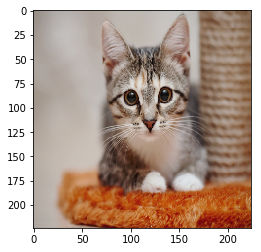

In [25]:
testimage = Image.open('./test/testimage_cat_001.jpg')
testimage = np.asarray(testimage)
testimage = cv2.resize(testimage, (224,224))

plt.imshow(testimage)

predict_prob = model.predict(testimage.reshape(1, 224,224,3)/255)
print('predict : {}'.format('dog' if predict_prob<=0.5 else 'cat'))
print('predict_prob : {}'.format(predict_prob))

predict : cat
predict_prob : [[1.]]


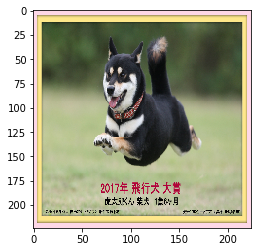

In [26]:
testimage = Image.open('./test/testimage_dog_001.jpg')
testimage = np.asarray(testimage)
testimage = cv2.resize(testimage, (224,224))

plt.imshow(testimage)

predict_prob = model.predict(testimage.reshape(1, 224,224,3)/255)
print('predict : {}'.format('dog' if predict_prob<=0.5 else 'cat'))
print('predict_prob : {}'.format(predict_prob))

predict : cat
predict_prob : [[1.]]


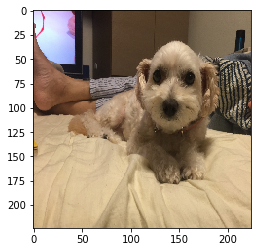

In [27]:
testimage = Image.open('./test/testimage_dog_002.jpg')
testimage = np.asarray(testimage)
testimage = cv2.resize(testimage, (224,224))

plt.imshow(testimage)

predict_prob = model.predict(testimage.reshape(1, 224,224,3)/255)
print('predict : {}'.format('dog' if predict_prob<=0.5 else 'cat'))
print('predict_prob : {}'.format(predict_prob))

- データ拡張を行ったものの、正しく犬と予測することができなかった。
- 原因としては、学習データに同一の犬を使用したことと考えられる。

## 【問題3】物体検出データセットの用意
次に、物体検出を行います。バウンディングボックスのアノテーションを行い物体検出のためのデータセットを作成してください。

**アノテーションのためのツール**

アノテーションツールにはLabelImgなどがあります。

[tzutalin/labelImg: LabelImg is a graphical image annotation tool and label object bounding boxes in images](https://github.com/tzutalin/labelImg)

## 【問題4】物体検出データセットに対するデータ拡張
データ拡張（Data Augmentation）を行ってください。前述のalbumentationsはバウンディングボックスを合わせての加工が可能です。詳細はREADME.mdを確認してください。

物体検出の学習を行なうかどうかは任意とします。

In [28]:
%matplotlib inline
from urllib.request import urlopen
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt

from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    RandomCrop,
    Crop,
    Compose
)

In [29]:
# Functions to visualize bounding boxes and class labels on an image. 
# Based on https://github.com/facebookresearch/Detectron/blob/master/detectron/utils/vis.py

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)


def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, x_max, y_max = bbox
    x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max) 
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img


def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(12, 12))
    plt.imshow(img)

In [30]:
def get_aug(aug, min_area=0., min_visibility=0.):
    return Compose(aug, bbox_params={
                                                'format': 'pascal_voc', 
                                                'min_area': min_area, 
                                                'min_visibility': min_visibility, 
                                                'label_fields': ['category_id']})

In [31]:
image = cv2.imread('picture/cat/cat_0001.jpg')

image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [32]:
import xml.etree.ElementTree as ET 

# XMLファイルを解析
tree = ET.parse('picture/cat/cat_0001.xml') 

# XMLを取得
root = tree.getroot()

In [33]:
annotations = {'image': image, 'bboxes': [[float(root[6][4][0].text), float(root[6][4][1].text), float(root[6][4][2].text), float(root[6][4][3].text)]], 'category_id': [1]}
category_id_to_name = {1:'cat'}

### original image

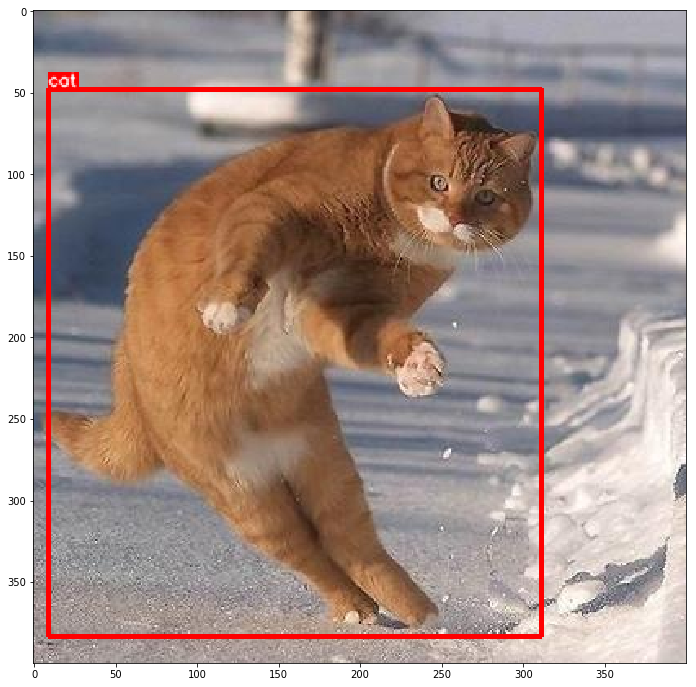

In [34]:
visualize(annotations, category_id_to_name)

### 回転

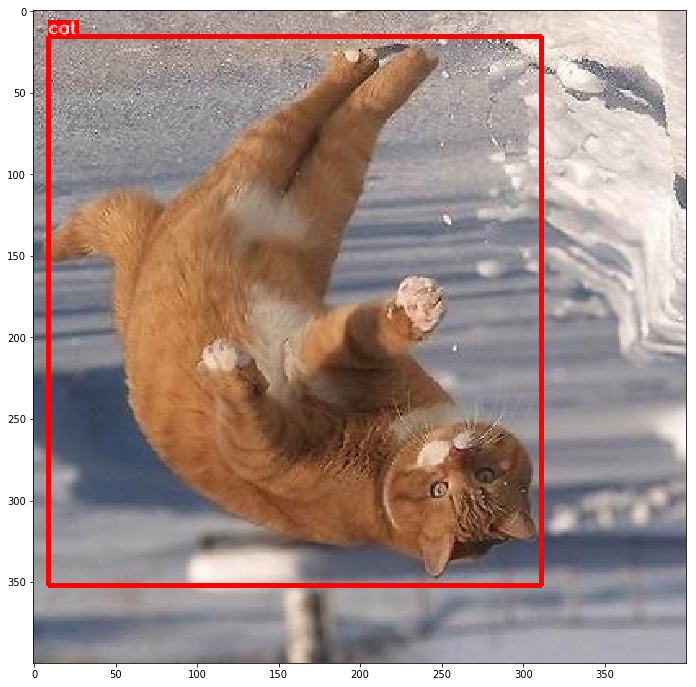

In [35]:
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

### 反転

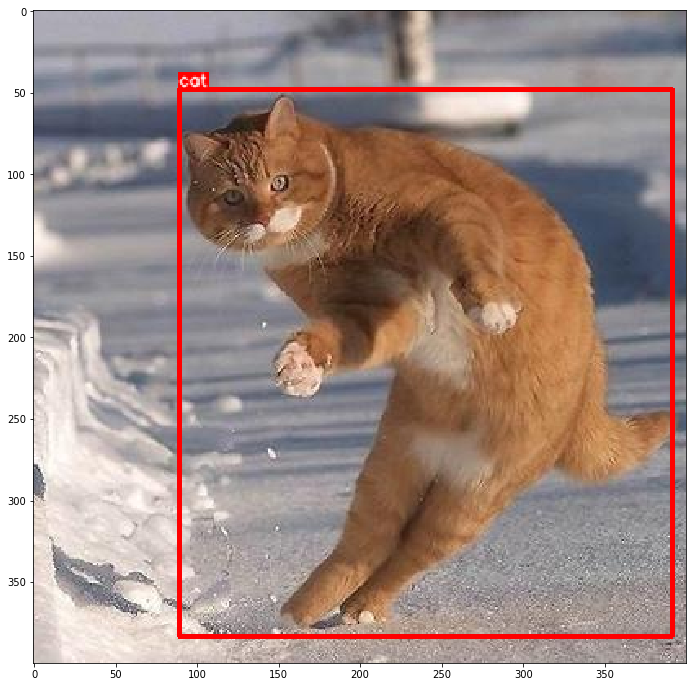

In [36]:
aug = get_aug([HorizontalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

### CenterCrop

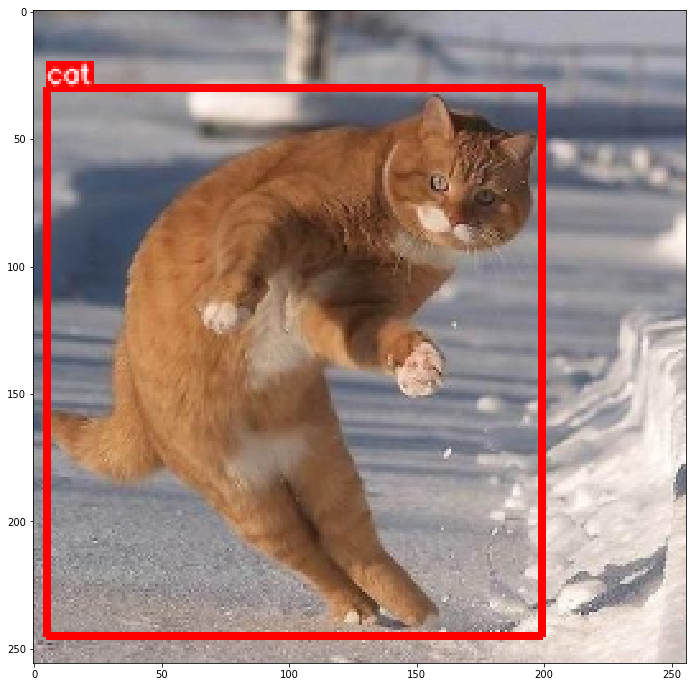

In [37]:
aug = get_aug([Resize(p=1, height=256, width=256)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)


### CenterCrop with default filter 

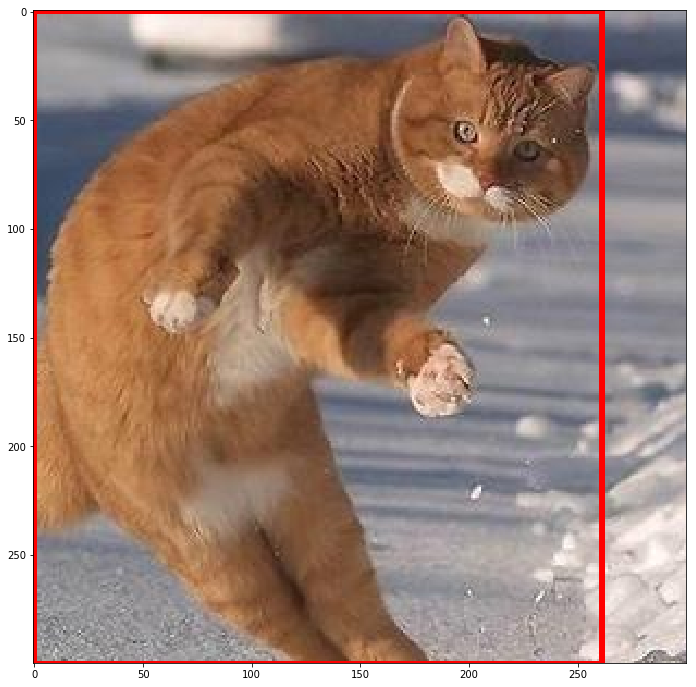

In [38]:
aug = get_aug([CenterCrop(p=1, height=300, width=300)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

### CenterCrop + filter with min_area 

[1]


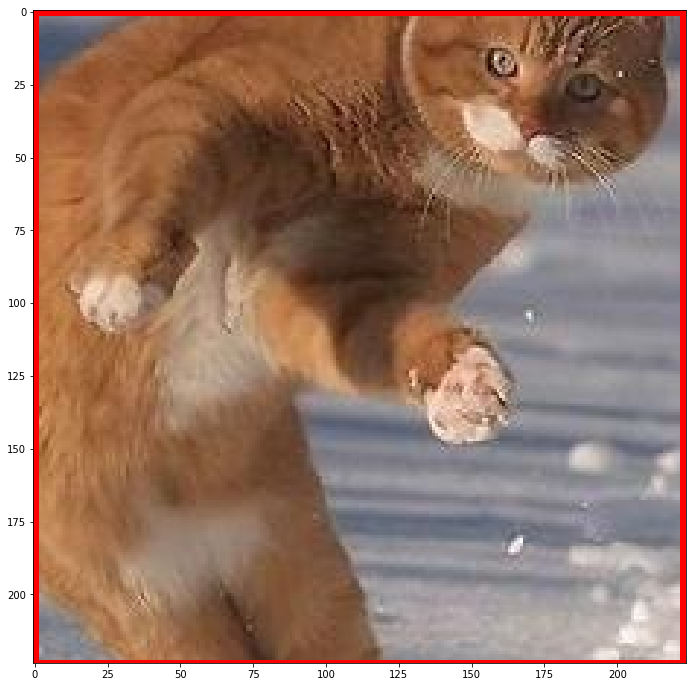

In [39]:
aug = get_aug([CenterCrop(p=1, height=224, width=224)])
augmented = aug(**annotations)
print(augmented['category_id'])
visualize(augmented, category_id_to_name)

### CenterCrop + filter with min_area

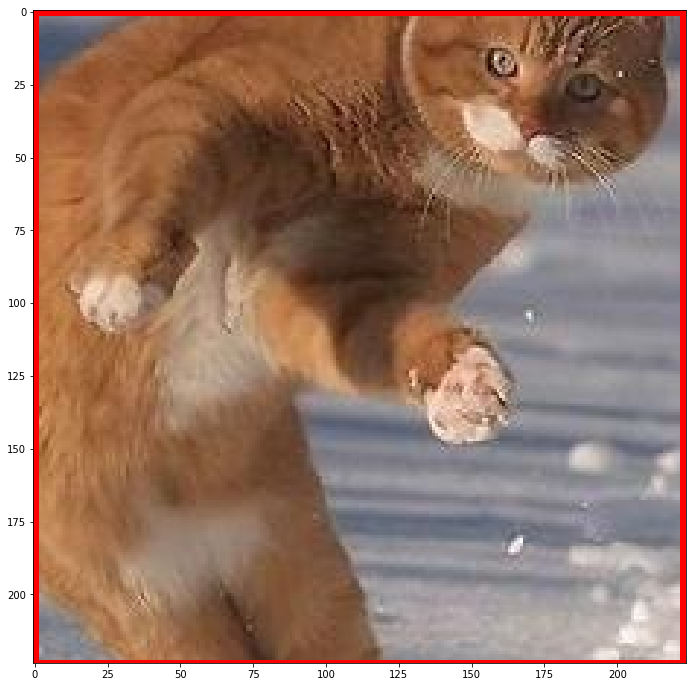

In [40]:
aug = get_aug([CenterCrop(p=1, height=224, width=224)], min_area=4000)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

### CenterCrop + filter by visibility 

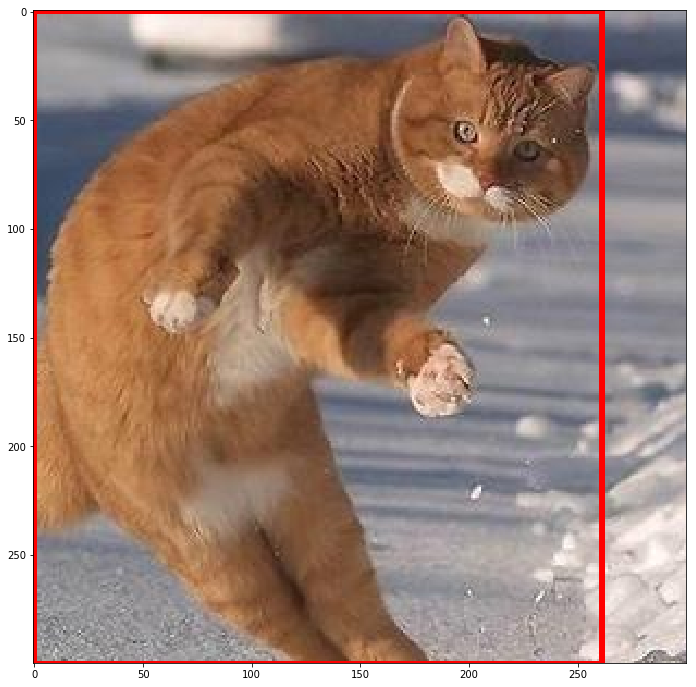

In [41]:
# Compose filters bounding boxes and returns
# only those boxes whose visibility after transformation is above the threshold.
aug = get_aug([CenterCrop(p=1, height=300, width=300)], min_visibility=0.3)
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

# Visibility of the transformed bbox for `dog` is about 0.25 (that means that
# the area of the transformed bbox is about 25% of the area of the original bbox),
# so it will be removed
# Visibility of the transformed bbox for `cat` is about 0.36,
# so it will be kept.